<h1 style="text-align:center;">Building Energy Load Prediction - Machine Learnning Project</h1>

---

<p style="text-align:right"><b>Project creator: Naudeen Stewart</b></p>

**Notebook Contents:**

**Import Necessary Libraries & Load Data**

**Explorative Data Anaylsis**
1. Data Exploration & Visualizations
2. Descriptive Statistics
3. Correlation Analysis
4. Linearity Check
5. Multicolinearity Check
6. Techniques Moving Forward
    
**Regression Models (RidgeCV & LassoCV)**
1.  Heating Load Models
2.  Cooling Load Models
3.  Regression Predictions

**Classification Models**
1.  Dimensionality Reduction & Setup
2.  Model Building (Random Forest & KNN)
3.  Classification Predictions

##  Import Neccessary Libraries & Read in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2. Load dataset
df = pd.read_excel("ENB2012_data.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [5]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Explorative Data Analysis

## Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df["Glazing Area Distribution"].value_counts()

Glazing Area Distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

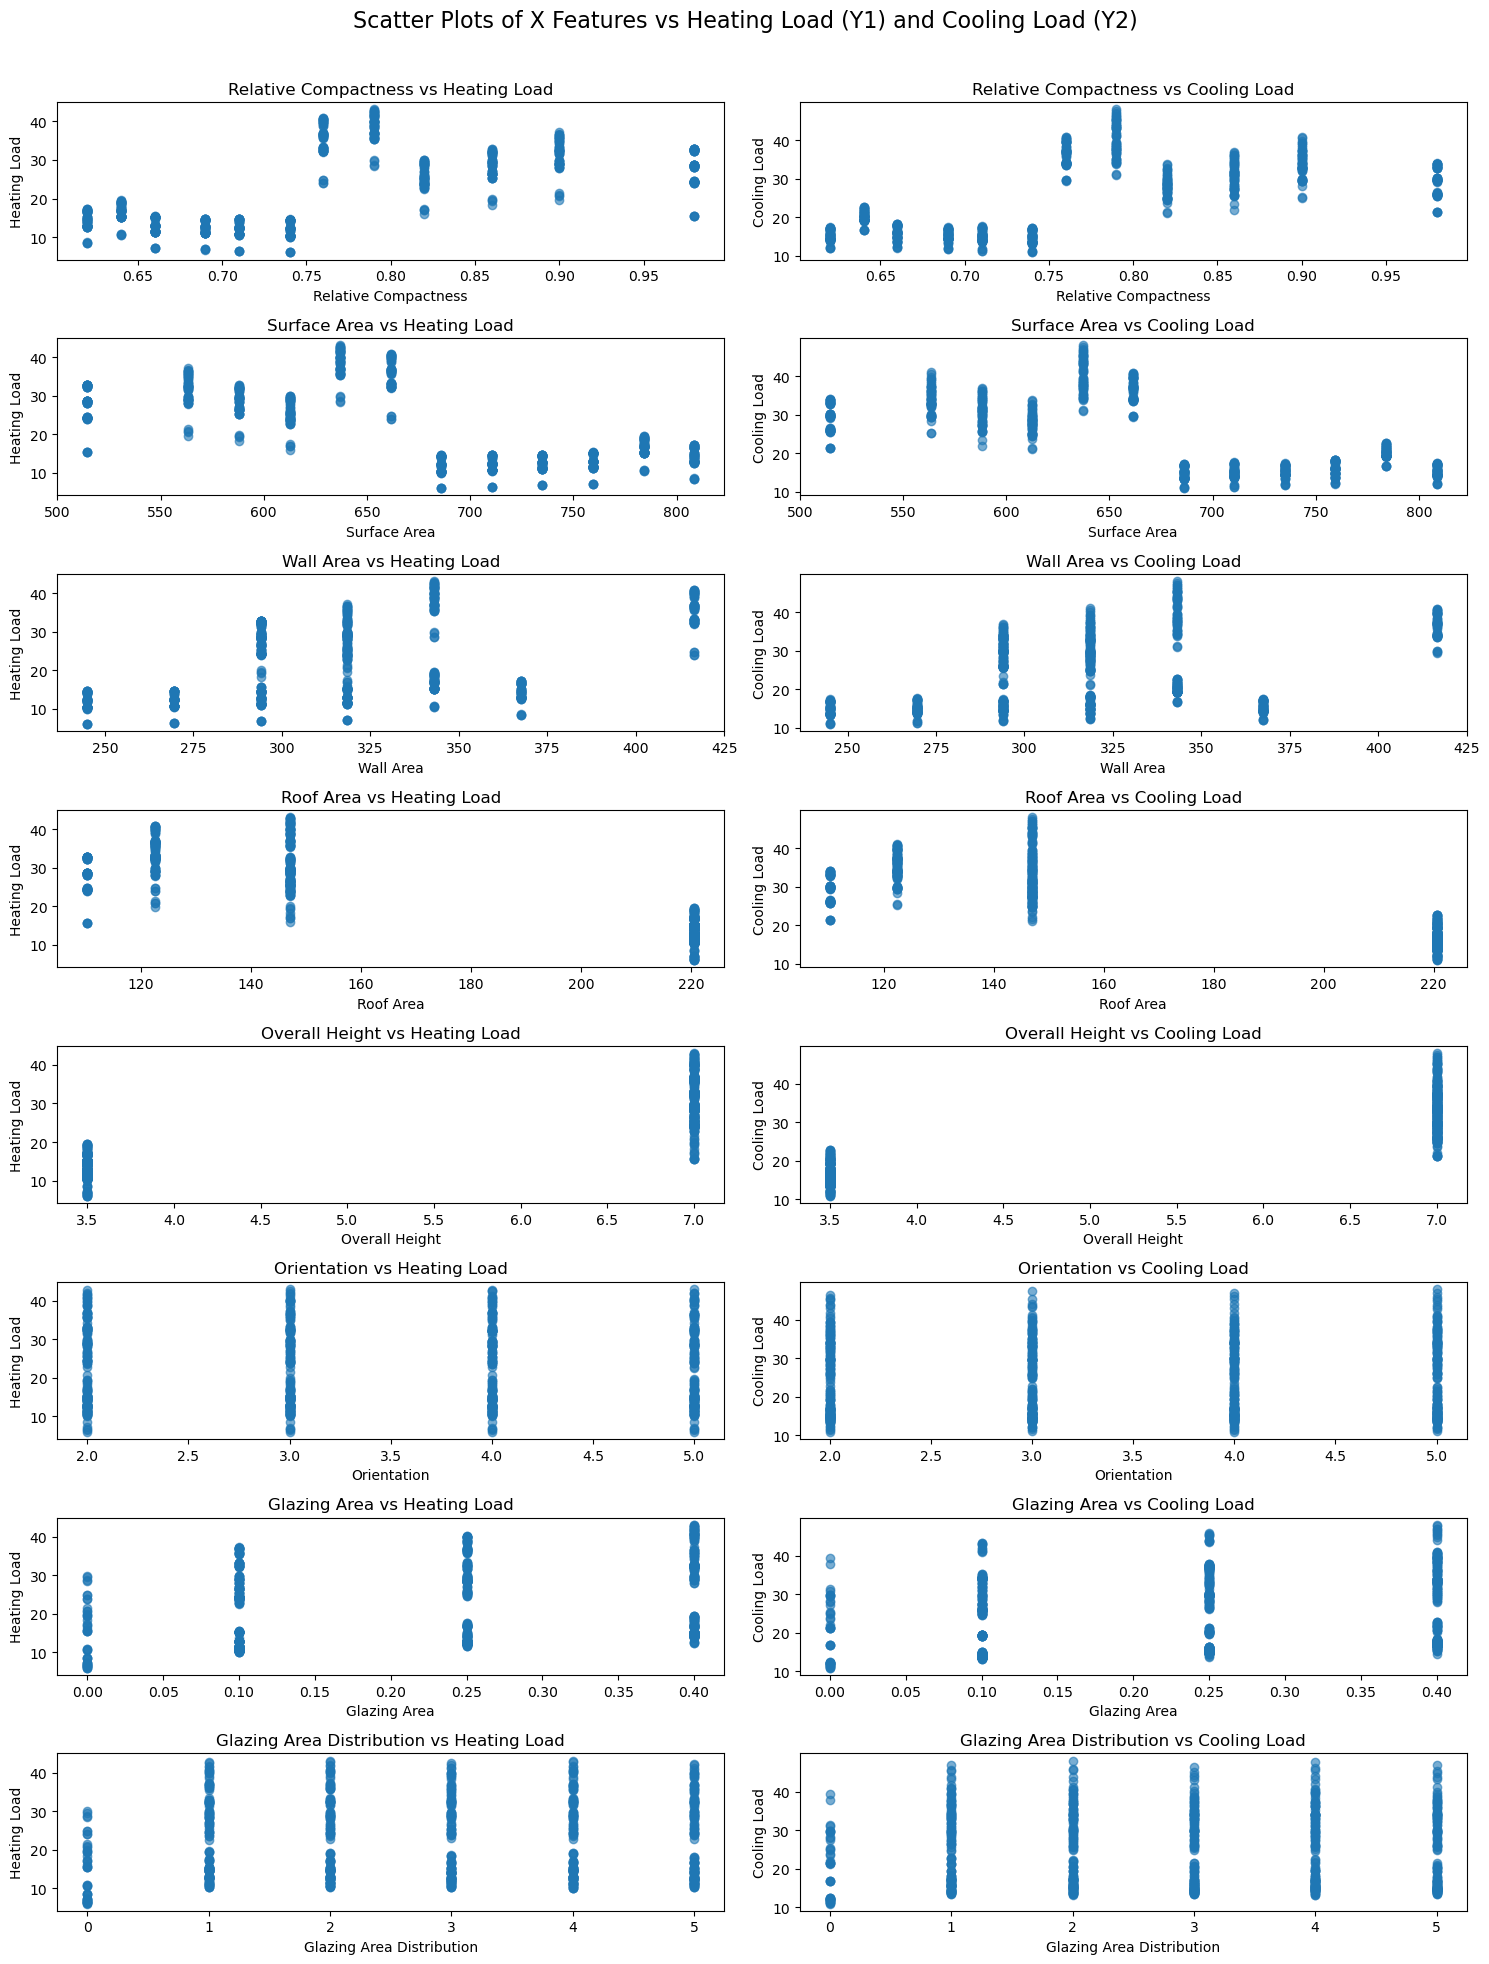

In [9]:
# Define X columns and Y columns
X_columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", 
             "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
Y_columns = ["Heating Load", "Cooling Load"]

# Plot each feature against Y1 and Y2
fig, axes = plt.subplots(len(X_columns), 2, figsize=(15, 20))
fig.suptitle('Scatter Plots of X Features vs Heating Load (Y1) and Cooling Load (Y2)', fontsize=16)

for i, x_col in enumerate(X_columns):
    for j, y_col in enumerate(Y_columns):
        axes[i, j].scatter(df[x_col], df[y_col], alpha=0.6)
        axes[i, j].set_xlabel(x_col)
        axes[i, j].set_ylabel(y_col)
        axes[i, j].set_title(f'{x_col} vs {y_col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Descriptive Statistics

In [10]:
# Summary Statistics
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Correlation Analysis

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix[['Heating Load', 'Cooling Load']]

,Heating Load,Cooling Load
Relative Compactness,0.622272,0.634339
Surface Area,-0.658120,-0.672999
Wall Area,0.455671,0.427117
Roof Area,-0.861828,-0.862547
Overall Height,0.889430,0.895785
Orientation,-0.002587,0.014290
Glazing Area,0.269842,0.207505
Glazing Area Distribution,0.087368,0.050525
Heating Load,1.000000,0.975862
Cooling Load,0.975862,1.000000


In [12]:
# Pearson correlation test
from scipy.stats import pearsonr

for col in X_columns:
    corr, p_value = pearsonr(df[col], df['Heating Load'])
    print(f"Feature: {col} - Correlation with Heating Load: {corr:.2f}, p-value: {p_value:.5f}")

Feature: Relative Compactness - Correlation with Heating Load: 0.62, p-value: 0.00000
Feature: Surface Area - Correlation with Heating Load: -0.66, p-value: 0.00000
Feature: Wall Area - Correlation with Heating Load: 0.46, p-value: 0.00000
Feature: Roof Area - Correlation with Heating Load: -0.86, p-value: 0.00000
Feature: Overall Height - Correlation with Heating Load: 0.89, p-value: 0.00000
Feature: Orientation - Correlation with Heating Load: -0.00, p-value: 0.94294
Feature: Glazing Area - Correlation with Heating Load: 0.27, p-value: 0.00000
Feature: Glazing Area Distribution - Correlation with Heating Load: 0.09, p-value: 0.01544


In [13]:
for col in X_columns:
    corr, p_value = pearsonr(df[col], df['Cooling Load'])
    print(f"Feature: {col} - Correlation with Cooling Load: {corr:.2f}, p-value: {p_value:.5f}")

Feature: Relative Compactness - Correlation with Cooling Load: 0.63, p-value: 0.00000
Feature: Surface Area - Correlation with Cooling Load: -0.67, p-value: 0.00000
Feature: Wall Area - Correlation with Cooling Load: 0.43, p-value: 0.00000
Feature: Roof Area - Correlation with Cooling Load: -0.86, p-value: 0.00000
Feature: Overall Height - Correlation with Cooling Load: 0.90, p-value: 0.00000
Feature: Orientation - Correlation with Cooling Load: 0.01, p-value: 0.69256
Feature: Glazing Area - Correlation with Cooling Load: 0.21, p-value: 0.00000
Feature: Glazing Area Distribution - Correlation with Cooling Load: 0.05, p-value: 0.16187


Orientation & Glazing Area Distribution columns should be dropped 

In [14]:
df.head(1)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33


<Axes: >

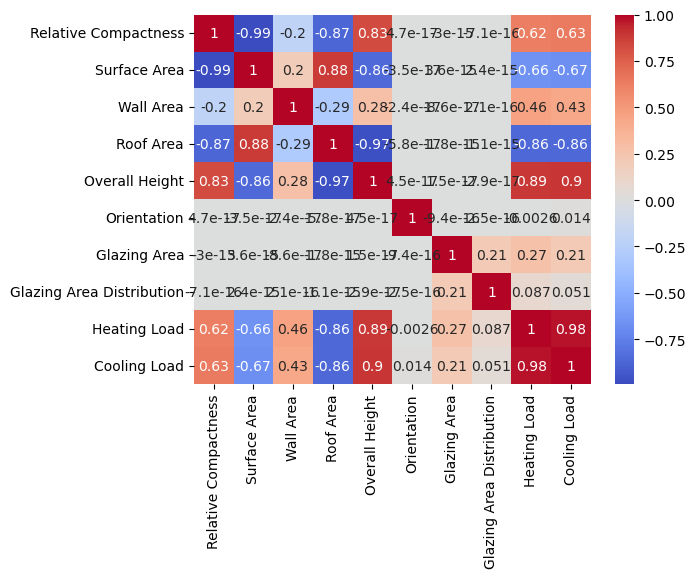

In [15]:
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

### Check for Linearity

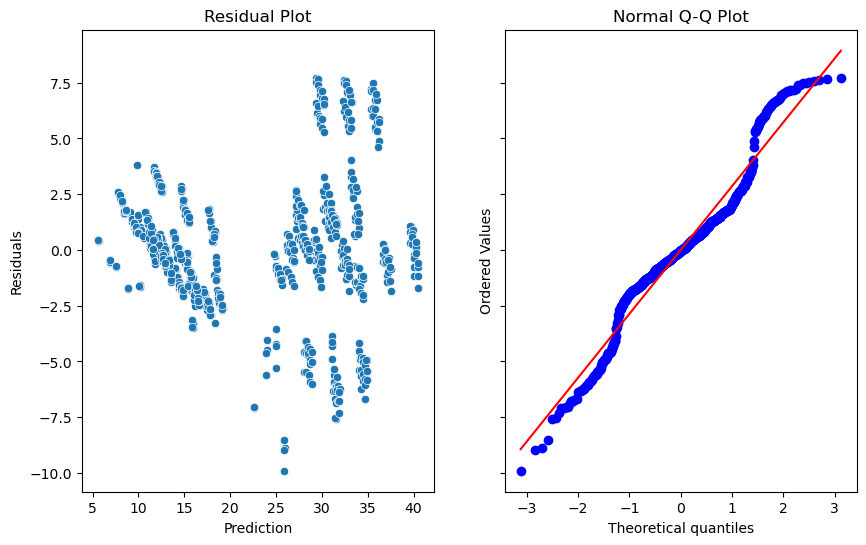

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a model for  Heating Load
X = df[X_columns]
X = sm.add_constant(X)  # Adds a constant to the model
Y1 = df['Heating Load']
model = sm.OLS(Y1, X).fit()

# Residual plot
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")  
    

residual_analysis_plots(model)

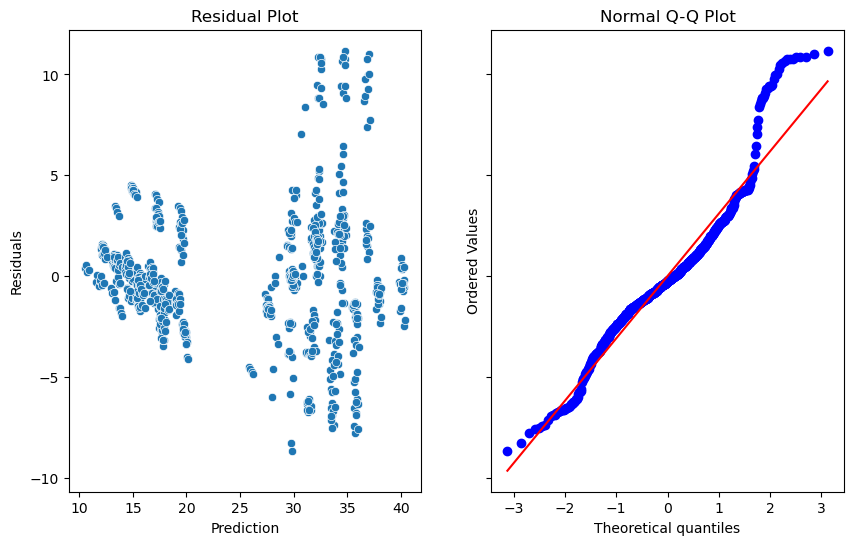

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a model for  Cooling Load
X = df[X_columns]
X = sm.add_constant(X)  # Adds a constant to the model
Y1 = df['Cooling Load']
model = sm.OLS(Y1, X).fit()

# Residual plot
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")  
    

residual_analysis_plots(model)

### Findings from the residual and Q-Q plots:
- Residual Plot: The plot shows some pattern in the residuals, suggesting that the relationship between the predictors and the response variable may not be entirely linear. Ideally, residuals should be randomly scattered around zero without any distinct patterns. The clustered appearance in the plot indicates possible non-linear relationships or that certain predictor variables may not be adequately capturing the variation in the output.
- Normal Q-Q Plot: The Q-Q plot compares the distribution of residuals with a normal distribution. The deviations from the red line (especially in the tails) indicate that the residuals are not normally distributed. We can see some curvature, particularly at the extremes, suggesting that the residuals deviate from normality.


### Check for multicolinearity

In [18]:
df[X_columns].corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
X = df[X_columns]
X = sm.add_constant(X)  # Add intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                     Feature           VIF
0                      const  3.231389e+04
1       Relative Compactness  1.055241e+02
2               Surface Area           inf
3                  Wall Area           inf
4                  Roof Area           inf
5             Overall Height  3.120547e+01
6                Orientation  1.000000e+00
7               Glazing Area  1.047508e+00
8  Glazing Area Distribution  1.047508e+00


C:\Users\egagn\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Findings from Correlation Matrix & VIF Results:
- Correlation Matrix:
  - Several features have correlation values close to ±1, indicating strong linear relationships between them. For example, “Relative Compactness” and “Surface Area” are almost perfectly negatively correlated, while other features like “Roof Area” and “Wall Area” also show high correlations.
  - This high correlation is likely causing issues with multicollinearity.

- VIF Result:
  - The VIF for multiple features is inf (infinity), and the VIF values for others are exceedingly high. A VIF of infinity suggests perfect collinearity, meaning that one or more predictors are linearly dependent on each others

## Techniques Moving Forward to address issues:
- Regularization:
    - Ridge and Lasso regression will be used instead of OLS. Ridge can help manage multicolinearity by adding a penalty for large coefficeints, which can help stabalize the model.
- Dimensionality Reduction:
    - Principal Component Analysis (PCA) will be used within the classification model. This will create new, uncorrelated components that capture most of the variance of the data. It will help reduce multicolinearity by transforming correlated features into independent principal components.

In [20]:
df = df.drop(columns=['Orientation','Glazing Area Distribution'])

# Regression Models (RidgeCV & LassoCV)

In [21]:
df_heat = df.drop(columns='Cooling Load')

In [22]:
df_cool = df.drop(columns='Heating Load')

## Heating Load Models

In [23]:
X = df_heat.drop(columns=['Heating Load'])
y= df_heat['Heating Load']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import  StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### RidgeCV (Heating)

In [26]:
# RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [27]:
ridge_cv_model.alpha_

1.0

In [28]:
# Evaluation metrics
y_pred_train = ridge_cv_model.predict(X_train_scaled)
y_pred_test = ridge_cv_model.predict(X_test_scaled)

# metrics
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, y_pred_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, y_pred_test)

In [29]:
df_ridgeCV_metrics=pd.DataFrame({"Ridge train":[MAE_train,MSE_train,RMSE_train,R2_train],
                        "Ridge test":[MAE_test,MSE_test,RMSE_test,R2_test]},
                         index=["MAE","MSE","RMSE","R2_Score"])

In [30]:
df_ridgeCV_metrics

,Ridge train,Ridge test
MAE,2.043394,2.231480
MSE,8.519016,9.378907
RMSE,2.918735,3.062500
R2_Score,0.917087,0.901305


In [31]:
ridge_cv_model.coef_

array([-5.90452768, -2.90000812,  0.79451436, -3.21635896,  8.04837384,
        2.69517599])

### LassoCV (Heating)

In [32]:
lassocv_model = LassoCV(eps=0.001,n_alphas=200,cv=10)

lassocv_model.fit(X_train_scaled,y_train)

LassoCV(cv=10, n_alphas=200)

In [33]:
# Optimal alpha value
lassocv_model.alpha_

0.009029349637354982

In [34]:
# Evaluation metrics
y_pred_train = lassocv_model.predict(X_train_scaled)
y_pred_test = lassocv_model.predict(X_test_scaled)

# metrics
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
lassocv_r2_train = r2_score(y_train, y_pred_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(MSE_test)
lassocv_r2_test = r2_score(y_test, y_pred_test)

In [35]:
df_lassocv_metrics= pd.DataFrame({"LassoCV train":[MAE_train, MSE_train, RMSE_train, lassocv_r2_train],
                                    "LassoCV test":[MAE_test,MSE_test,RMSE_test,lassocv_r2_test]},
                                 index=["MAE","MSE","RMSE","R2_Score"])
df_lassocv_metrics

,LassoCV train,LassoCV test
MAE,2.047711,2.241457
MSE,8.527201,9.432526
RMSE,2.920137,3.071242
R2_Score,0.917007,0.900741


In [36]:
lassocv_model.coef_

array([-5.54125534, -1.3510838 ,  0.20639565, -4.1754512 ,  8.31099584,
        2.68902141])

In [37]:
lasso_pr_heat_model = lassocv_model # will use this model for prediction

## Cooling Load Models

In [38]:
X = df_cool.drop(columns=['Cooling Load'])
y= df_cool['Cooling Load']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### RidgeCV (cooling)

In [40]:
# RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [41]:
# Evaluation metrics
y_pred_train = ridge_cv_model.predict(X_train_scaled)
y_pred_test = ridge_cv_model.predict(X_test_scaled)

# metrics
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, y_pred_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, y_pred_test)

In [42]:
df_ridgeCV_metrics=pd.DataFrame({"Ridge train":[MAE_train,MSE_train,RMSE_train,R2_train],
                        "Ridge test":[MAE_test,MSE_test,RMSE_test,R2_test]},
                         index=["MAE","MSE","RMSE","R2_Score"])

In [43]:
df_ridgeCV_metrics

,Ridge train,Ridge test
MAE,2.183281,2.686156
MSE,9.538200,13.779967
RMSE,3.088398,3.712138
R2_Score,0.893351,0.854252


### LassoCV (cooling)

In [44]:
lassocv_model = LassoCV(eps=0.001,n_alphas=200,cv=10,max_iter = 10000)

lassocv_model.fit(X_train_scaled,y_train)

LassoCV(cv=10, max_iter=10000, n_alphas=200)

In [45]:
# Optimal alpha value
lassocv_model.alpha_

0.008486039761126135

In [46]:
# Evaluation metrics
y_pred_train = lassocv_model.predict(X_train_scaled)
y_pred_test = lassocv_model.predict(X_test_scaled)

# metrics
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
lassocv_r2_train = r2_score(y_train, y_pred_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(MSE_test)
lassocv_r2_test = r2_score(y_test, y_pred_test)

In [47]:
df_lassocv_metrics= pd.DataFrame({"LassoCV train":[MAE_train, MSE_train, RMSE_train, lassocv_r2_train],
                                    "LassoCV test":[MAE_test,MSE_test,RMSE_test,lassocv_r2_test]},
                                 index=["MAE","MSE","RMSE","R2_Score"])
df_lassocv_metrics

,LassoCV train,LassoCV test
MAE,2.182712,2.684688
MSE,9.548797,13.792402
RMSE,3.090113,3.713812
R2_Score,0.893233,0.854120


In [48]:
lassocv_model.coef_

array([-6.01237326, -2.22504675, -0.        , -3.51253575,  8.11574459,
        1.96400701])

In [49]:
lasso_pr_cool_model = lassocv_model      # will use this model for prediction

In [50]:
feature_names = X_train.columns

In [51]:
feature_names

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area'],
      dtype='object')

## Regression Predictions

### Regression Heating Load Prediction

In [53]:
X_heat = df_heat.drop(columns=['Heating Load'])
y_heat= df_heat['Heating Load']

X_cool = df_cool.drop(columns=['Cooling Load'])
y_cool = df_cool['Cooling Load']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_heat, y_heat, test_size=0.15, random_state=1)
y_test.head(1)

285    12.74
Name: Heating Load, dtype: float64

In [55]:
df_heat.iloc[285]

Relative Compactness      0.62
Surface Area            808.50
Wall Area               367.50
Roof Area               220.50
Overall Height            3.50
Glazing Area              0.10
Heating Load             12.74
Name: 285, dtype: float64

In [56]:
# Building info in array format
heat_prediction_building = [[0.62, 808.50, 367.50, 220.50, 3.50, 0.10]]

In [57]:
scaled_building = scaler.transform(heat_prediction_building)
heating_load_pred = lasso_pr_heat_model.predict(scaled_building)
heating_load_pred

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12.97247977])

In [58]:
print(f"The model predicts that the building heating load will be: {heating_load_pred}")

The model predicts that the building heating load will be: [12.97247977]


### Regression Cooling Load Prediction

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_cool, y_cool, test_size=0.15, random_state=1)
y_test.head(1)

285    13.97
Name: Cooling Load, dtype: float64

In [60]:
df_cool.iloc[285]

Relative Compactness      0.62
Surface Area            808.50
Wall Area               367.50
Roof Area               220.50
Overall Height            3.50
Glazing Area              0.10
Cooling Load             13.97
Name: 285, dtype: float64

In [61]:
# Building info in array format
cool_prediction_building = [[0.62, 808.50, 367.50, 220.50, 3.50, 0.10]]

In [85]:
scaled_building_cool = scaler.transform(cool_prediction_building)
cooling_load_pred = lasso_pr_cool_model.predict(scaled_building_cool)
cooling_load_pred

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.80917593])

In [89]:
print(f"The model predicts that the building cooling load will be: {cooling_load_pred}")

The model predicts that the building cooling load will be: [15.80917593]


# Classification Models

## Dimensionality Reduction & Setup

In [105]:
df_classification = df

In [ ]:
# Round all energy Load values to nearest integer in attempt to create a class for each integer value.

In [107]:
# Rounding Heating Load and Cooling Load columns to the nearest integer
df_classification['Heating Load'] = df_classification['Heating Load'].round()
df_classification['Cooling Load'] = df_classification['Cooling Load'].round()
df_classification.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0
1,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0
2,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0
3,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0
4,0.90,563.5,318.5,122.50,7.0,0.0,21.0,28.0


In [109]:
scaler = StandardScaler()
X = df_classification.drop(['Heating Load', 'Cooling Load'] ,axis=1)
y1 = df_classification['Heating Load']
y2 = df_classification['Cooling Load']

X_scaled = scaler.fit_transform(X)

In [111]:
# New df with X features only

dfx = pd.DataFrame(data=X_scaled,columns=X.columns)
dfx.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.760447
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.760447


In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)

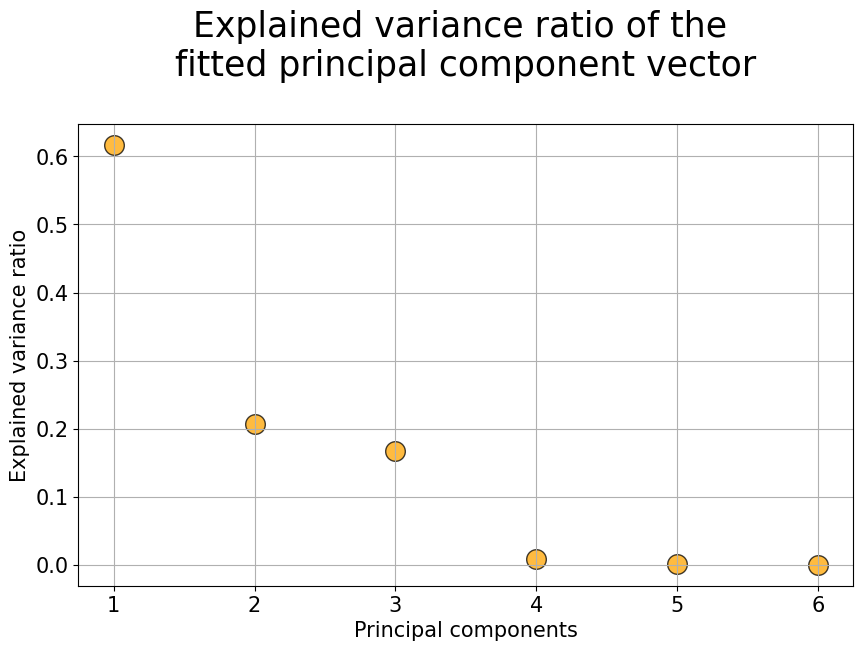

In [115]:
# Plotting the explained variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [336]:
pca = PCA(n_components=3)
dfx_trans = pca.fit_transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans, columns=['PC1', 'PC2', 'PC3'])
dfx_trans.head()

,PC1,PC2,PC3
0,3.128954,-0.902373,1.760447
1,3.128954,-0.902373,1.760447
2,3.128954,-0.902373,1.760447
3,3.128954,-0.902373,1.760447
4,2.355562,-0.141667,1.760447


Models with integer classes failed to produce well performing metrics. This could be due to the energy load values being quite varried with some having very few samples. This likely caused an imbalance issue.<br>
Instead, the energy loads (Heating and Cooling seperately) will be grouped into 4 classes ("Low", "Low Moderate", "High Moderate", "High").

In [127]:
df_classification['Heating Load'].value_counts().sort_values()

Heating Load
9.0      1
34.0     2
38.0     2
8.0      3
31.0     3
21.0     3
20.0     4
23.0     5
43.0     5
7.0      8
27.0     8
6.0      8
35.0     9
42.0     9
16.0    10
18.0    10
41.0    12
39.0    12
19.0    13
26.0    16
28.0    19
40.0    20
30.0    20
10.0    20
25.0    22
36.0    24
37.0    25
24.0    33
33.0    34
17.0    35
32.0    43
14.0    44
29.0    45
12.0    54
11.0    55
13.0    58
15.0    74
Name: count, dtype: int64

In [129]:
df_classification['Cooling Load'].max()

48.0

In [131]:
# Discretize 'Heating Load' and 'Cooling Load' into bins 

df_classification['Heating Load Class'] = pd.cut(df_classification['Heating Load'], bins=[0, 15, 24, 32, 50], labels=[0, 1, 2, 3])
df_classification['Heating Load Class Label'] = pd.cut(df_classification['Heating Load'], bins=[0, 15, 24, 32, 50], labels=["Low", "Low Moderate", "High Moderate", "High"])
df_classification['Cooling Load Class'] = pd.cut(df_classification['Cooling Load'], bins=[0, 15, 24, 32, 50], labels=[0, 1, 2, 3])
df_classification['Cooling Load Class Label'] = pd.cut(df_classification['Cooling Load'], bins=[0, 15, 24, 32, 50], labels=["Low", "Low Moderate", "High Moderate", "High"])

In [133]:
df_classification['Cooling Load Class'].value_counts()

Cooling Load Class
3    212
1    209
0    184
2    163
Name: count, dtype: int64

In [135]:
df_classification['Heating Load Class'].value_counts()

Heating Load Class
0    325
2    176
3    154
1    113
Name: count, dtype: int64

In [137]:
df_classification.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,Heating Load Class,Heating Load Class Label,Cooling Load Class,Cooling Load Class Label
0,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0,1,Low Moderate,1,Low Moderate
1,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0,1,Low Moderate,1,Low Moderate
2,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0,1,Low Moderate,1,Low Moderate
3,0.98,514.5,294.0,110.25,7.0,0.0,16.0,21.0,1,Low Moderate,1,Low Moderate
4,0.90,563.5,318.5,122.50,7.0,0.0,21.0,28.0,1,Low Moderate,2,High Moderate


In [139]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Relative Compactness      768 non-null    float64 
 1   Surface Area              768 non-null    float64 
 2   Wall Area                 768 non-null    float64 
 3   Roof Area                 768 non-null    float64 
 4   Overall Height            768 non-null    float64 
 5   Glazing Area              768 non-null    float64 
 6   Heating Load              768 non-null    float64 
 7   Cooling Load              768 non-null    float64 
 8   Heating Load Class        768 non-null    category
 9   Heating Load Class Label  768 non-null    category
 10  Cooling Load Class        768 non-null    category
 11  Cooling Load Class Label  768 non-null    category
dtypes: category(4), float64(8)
memory usage: 51.9 KB


In [141]:
df_classification['Heating Load Class'] = pd.to_numeric(df_classification['Heating Load Class'], errors='coerce')
df_classification['Cooling Load Class'] = pd.to_numeric(df_classification['Cooling Load Class'], errors='coerce')

In [143]:
df_classification.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Glazing Area                 float64
Heating Load                 float64
Cooling Load                 float64
Heating Load Class             int64
Heating Load Class Label    category
Cooling Load Class             int64
Cooling Load Class Label    category
dtype: object

## Model Building

In [338]:
# Separate X and y
X1 = dfx_trans     # Heating
X2 = dfx_trans     # Cooling
y1 = df_classification['Heating Load Class']
y2 = df_classification['Cooling Load Class']

In [340]:
# Train-test split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

### Random Forest Classifier

In [342]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


clf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf.fit(X1_train, y1_train)

#Predictions
y1_pred = clf.predict(X1_test)

# Evaluate
accuracy_score(y1_test, y1_pred)     # Heating Load

0.935064935064935

In [344]:
clf.fit(X2_train, y2_train)

#Predictions
y2_pred = clf.predict(X2_test)

# Evaluate
accuracy_score(y2_test, y2_pred)    # Cooling Load

0.8831168831168831

### KNN Classifier

In [346]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1 = KNeighborsClassifier(n_neighbors=1)   # Heating Load
knn_model2 = KNeighborsClassifier(n_neighbors=1)   # Cooling Load

knn_model1.fit(X1_train,y1_train)   # Heating Load

KNeighborsClassifier(n_neighbors=1)

In [348]:
knn_model2.fit(X2_train,y2_train)    # Cooling Load

KNeighborsClassifier(n_neighbors=1)

In [350]:
y1_pred = knn_model1.predict(X1_test)
y2_pred = knn_model2.predict(X2_test)

print(accuracy_score(y1_test,y1_pred))   # Heating Load
print(accuracy_score(y2_test,y2_pred))   # Cooling Load

0.935064935064935
0.8766233766233766


In [352]:
# Compare train and test scores  for Heating Load model

print('Training set score: {:.4f}'.format(knn_model1.score(X1_train, y1_train)))

print('Test set score: {:.4f}'.format(knn_model1.score(X1_test, y1_test)))

Training set score: 0.9560
Test set score: 0.9351


In [354]:
# Compare train and test scores for Cooling Load model

print('Training set score: {:.4f}'.format(knn_model2.score(X2_train, y2_train)))

print('Test set score: {:.4f}'.format(knn_model2.score(X2_test, y2_test)))

Training set score: 0.8762
Test set score: 0.8766


Now lets find optimal values for k

In [356]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
     
    ('classifier', KNeighborsClassifier())
])

In [358]:
pipe1 = pipe   # Heating
pipe2 = pipe   # Cooling

In [360]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': list(range(1,10)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier1 = GridSearchCV(pipe1,param_grid,cv=5,scoring='accuracy')

full_cv_classifier1.fit(X1_train,y1_train)   #Heating Load

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [362]:
# View best params
full_cv_classifier1.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier', KNeighborsClassifier(n_neighbors=3, p=2.0))],
 'verbose': False,
 'classifier': KNeighborsClassifier(n_neighbors=3, p=2.0),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 3,
 'classifier__p': 2.0,
 'classifier__weights': 'uniform'}

In [364]:
full_cv_classifier2 = GridSearchCV(pipe2,param_grid,cv=5,scoring='accuracy')
full_cv_classifier2.fit(X2_train,y2_train) # Cooling Laod

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [366]:
full_cv_classifier2.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier', KNeighborsClassifier(p=1.0))],
 'verbose': False,
 'classifier': KNeighborsClassifier(p=1.0),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 5,
 'classifier__p': 1.0,
 'classifier__weights': 'uniform'}

In [368]:
full_cv_classifier1.cv_results_['mean_test_score'].mean()

0.9360934144860574

In [370]:
full_cv_classifier2.cv_results_['mean_test_score'].mean()

0.8821955662179572

In [372]:
pipe1.set_params(classifier__n_neighbors=3)

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=3))])

In [374]:
pipe1.fit(X1_train,y1_train)   # Heating  Load

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=3))])

In [376]:
pipe_pred1 = pipe1.predict(X1_test)

# Compare train and test scores for Cooling Load model

print('Training set score: {:.4f}'.format(pipe1.score(X1_train, y1_train)))

print('Test set score: {:.4f}'.format(pipe1.score(X1_test, y1_test)))

Training set score: 0.9560
Test set score: 0.9351


In [378]:
pipe2.set_params(classifier__n_neighbors=5)

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [380]:
pipe2.fit(X2_train,y2_train)   # Cooling  Load

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [382]:
pipe_pred2 = pipe2.predict(X2_test)

# Compare train and test scores for Cooling Load model

print('Training set score: {:.4f}'.format(pipe2.score(X2_train, y2_train)))

print('Test set score: {:.4f}'.format(pipe2.score(X2_test, y2_test)))

Training set score: 0.8974
Test set score: 0.8442


In [384]:
print(classification_report(y1_test,pipe_pred1))   # Heating Load

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.81      1.00      0.89        17
           2       0.96      0.77      0.86        35
           3       0.88      0.97      0.92        37

    accuracy                           0.94       154
   macro avg       0.91      0.93      0.92       154
weighted avg       0.94      0.94      0.93       154



In [386]:
print(classification_report(y2_test,pipe_pred2))   # Cooling Load

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        43
           1       0.71      0.88      0.78        33
           2       0.80      0.88      0.84        32
           3       0.93      0.89      0.91        46

    accuracy                           0.84       154
   macro avg       0.85      0.85      0.84       154
weighted avg       0.86      0.84      0.85       154



## Classification Prediction

In [297]:
y1_test.head()

661    0
122    0
113    3
14     1
529    2
Name: Heating Load Class, dtype: int64

In [299]:
y2_test.head()

661    1
122    0
113    3
14     1
529    3
Name: Cooling Load Class, dtype: int64

In [303]:
df_classification.iloc[122]

Relative Compactness         0.74
Surface Area                686.0
Wall Area                   245.0
Roof Area                   220.5
Overall Height                3.5
Glazing Area                  0.1
Heating Load                 10.0
Cooling Load                 14.0
Heating Load Class              0
Heating Load Class Label      Low
Cooling Load Class              0
Cooling Load Class Label      Low
Name: 122, dtype: object

In [305]:
# Building info in array format
prediction_building = [[0.74, 686.0, 245.0, 220.5, 3.5, 0.1]]

In [307]:
scaled_building = scaler.transform(prediction_building)

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [390]:
# Apply PCA to reduce dimensionality
building_pca = pca.transform(scaled_building)

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [392]:
building_heat_pred = pipe1.predict(building_pca)

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [394]:
building_cool_pred = clf.predict(building_pca)

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [396]:
print(f"The model predicts that the building heating load class will be: {building_heat_pred}")

The model predicts that the building heating load class will be: [0]


In [398]:
print(f"The model predicts that the building cooling load class will be: {building_cool_pred}")

The model predicts that the building cooling load class will be: [0]
